<a href="https://colab.research.google.com/github/Aniruddha7/EIP3-Phase-2/blob/master/EIP_Assignment_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -q keras
import keras
#import keras
from keras.preprocessing.image import ImageDataGenerator  
from keras.callbacks import ModelCheckpoint
from keras.models import Model, Sequential
from keras.layers import Dropout, Flatten, Input, Activation
from keras.layers import Conv2D
from keras.optimizers import adam
from google.colab import drive
from keras.callbacks import *
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import backend as k
config = tf.ConfigProto()
config.gpu_options.allow_growth = True

In [24]:
!pip install -q keras
!pip install image-classifiers
!pip install git+https://github.com/qubvel/classification_models.git

  Cloning https://github.com/qubvel/classification_models.git to /tmp/pip-req-build-2gfuaiu_
  Running command git clone -q https://github.com/qubvel/classification_models.git /tmp/pip-req-build-2gfuaiu_
  Running command git submodule update --init --recursive -q
  Stored in directory: /tmp/pip-ephem-wheel-cache-kg3uazgs/wheels/de/2b/fd/29a6d33edb8c28bc7d94e95ea1d39c9a218ac500a3cfb1b197
Successfully built image-classifiers


In [25]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from classification_models.resnet import ResNet18, preprocess_input
model = ResNet18((224, 224, 3))

from classification_models import Classifiers

classifier, preprocess_input = Classifiers.get('resnet18')
model = classifier((224, 224, 3))



In [0]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from keras.applications.imagenet_utils import decode_predictions
from keras.layers import Dropout, Flatten, Input, Softmax, GlobalAveragePooling2D, merge, Activation
import cv2
import sys

#rom classification_models.resnet import ResNet18, preprocess_input
from keras.datasets import cifar10
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.utils import np_utils

(train_features, train_labels), (test_features, test_labels) = cifar10.load_data() # loading the CIFAR10 into train and test variables
num_train, img_channels, img_rows, img_cols =  train_features.shape #Setting number of image channels, coloums, rows
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))




In [0]:
(_, _), (_, test_class_labels) = cifar10.load_data()

In [0]:
train_features = train_features.astype('float32')/255           #Dividing the train and test data by color range of the image
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)


In [0]:
def accuracy(test_x, test_y, model):
  
  result = model.predict(test_x)
  predicted_class = np.argmax(result, axis=1)
  true_class = np.argmax(test_y, axis=1)
  num_correct = np.sum(predicted_class == true_class) 
  accuracy = float(num_correct)/result.shape[0]
  return (accuracy * 100)

In [31]:
from keras.layers.convolutional import Convolution2D

num_classes=len(np.unique(train_labels))
base_model = ResNet18(input_shape=(32,32,3), include_top=False)
Layer=Convolution2D(10, 1, 1, name='Layer1')(base_model.output)
x = keras.layers.GlobalAveragePooling2D()(Layer)
activation= Softmax()(x)
output=activation
model = keras.models.Model(inputs=[base_model.input], outputs=[output])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (1, 1), name="Layer1")`
  """


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, 32, 32, 3)    9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_91 (ZeroPadding2 (None, 38, 38, 3)    0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, 16, 16, 64)   9408        zero_padding2d_91[0][0]          
__________________________________________________________________________________________________
bn0 (Batch

In [0]:
from keras.callbacks import ModelCheckpoint

filepath = "/content/drive/My Drive/EIP Assignment 5.h5"
checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks=[checkpointer] 



In [35]:
from keras.preprocessing.image import ImageDataGenerator # Imagedatagenerator library is used for data augmentation with no horizontal flips

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 10, 
                                 validation_data = (test_features, test_labels), verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=10)`
  # Remove the CWD from sys.path while we load stuff.


Epoch 1/10
390/390 [==============================] - 59s 152ms/step - loss: 1.4023 - acc: 0.4941 - val_loss: 1.2583 - val_acc: 0.5502
Epoch 2/10
390/390 [==============================] - 53s 135ms/step - loss: 0.9984 - acc: 0.6478 - val_loss: 1.0311 - val_acc: 0.6442
Epoch 3/10
390/390 [==============================] - 52s 133ms/step - loss: 0.7947 - acc: 0.7226 - val_loss: 0.9864 - val_acc: 0.6757
Epoch 4/10
390/390 [==============================] - 52s 132ms/step - loss: 0.6621 - acc: 0.7666 - val_loss: 0.9118 - val_acc: 0.6962
Epoch 5/10
390/390 [==============================] - 51s 132ms/step - loss: 0.5431 - acc: 0.8110 - val_loss: 0.8860 - val_acc: 0.7141
Epoch 6/10
390/390 [==============================] - 51s 131ms/step - loss: 0.4416 - acc: 0.8444 - val_loss: 0.9013 - val_acc: 0.7145
Epoch 7/10
390/390 [==============================] - 51s 132ms/step - loss: 0.3565 - acc: 0.8756 - val_loss: 0.9452 - val_acc: 0.7262
Epoch 8/10
390/390 [==============================] - 5

In [0]:
import tensorflow as tf
from keras.models import load_model
model = load_model("/content/drive/My Drive/EIP Assignment 5.h5", custom_objects={'tf': tf})

In [39]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive 
from google.colab import auth 
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()                       
drive = GoogleDrive(gauth)

model.save('EIP Assignment 5.h5')
model_file = drive.CreateFile({'title' : 'EIP Assignment 5.h5'})                       
model_file.SetContentFile('EIP Assignment 5.h5')                       
model_file.Upload()
# download to google drive                       
drive.CreateFile({'id': model_file.get('id')})
#id '4/iQGfCOkXGR_Q7I1lNiDB8hJ1jdd_9kvjtGaf2qHiK-AoS1tXhcfaWkw'

model.save_weights('EIP Assignment 5.hdf5')


W0717 17:37:32.947626 139708964566912 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import Lock

In [0]:
preds = model.predict(test_features)
preds_index = np.argmax(preds,axis=1)
preds_index = preds_index.tolist()
# to convert 2-d array to list 
test_class_labels = test_class_labels.ravel()
# index
correct_index, misclassified_index = [],[]
for i in range(len(test_class_labels)):
  if preds_index[i] == test_class_labels[i]:
    correct_index.append(i)
  else:
    misclassified_index.append(i)

In [43]:
len(correct_index), len(misclassified_index)


(5694, 4306)

In [45]:
import pandas as pd
pd.Series(preds_index).value_counts().sort_index()



0     826
1    1025
2     890
3    1381
4    1013
5    1195
6     631
7     682
8    1692
9     665
dtype: int64

In [0]:
from keras.preprocessing import image
import keras.backend as K
import cv2
import sys

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


W0717 18:31:34.063299 139708964566912 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0717 18:31:37.607546 139708964566912 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0717 18:31:41.292335 139708964566912 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0717 18:31:44.992714 139708964566912 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0717 18:31:48.656772 139708964566912 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0717 18:31:52.445422 139708964566912 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0717 18:31:56.184249 139708

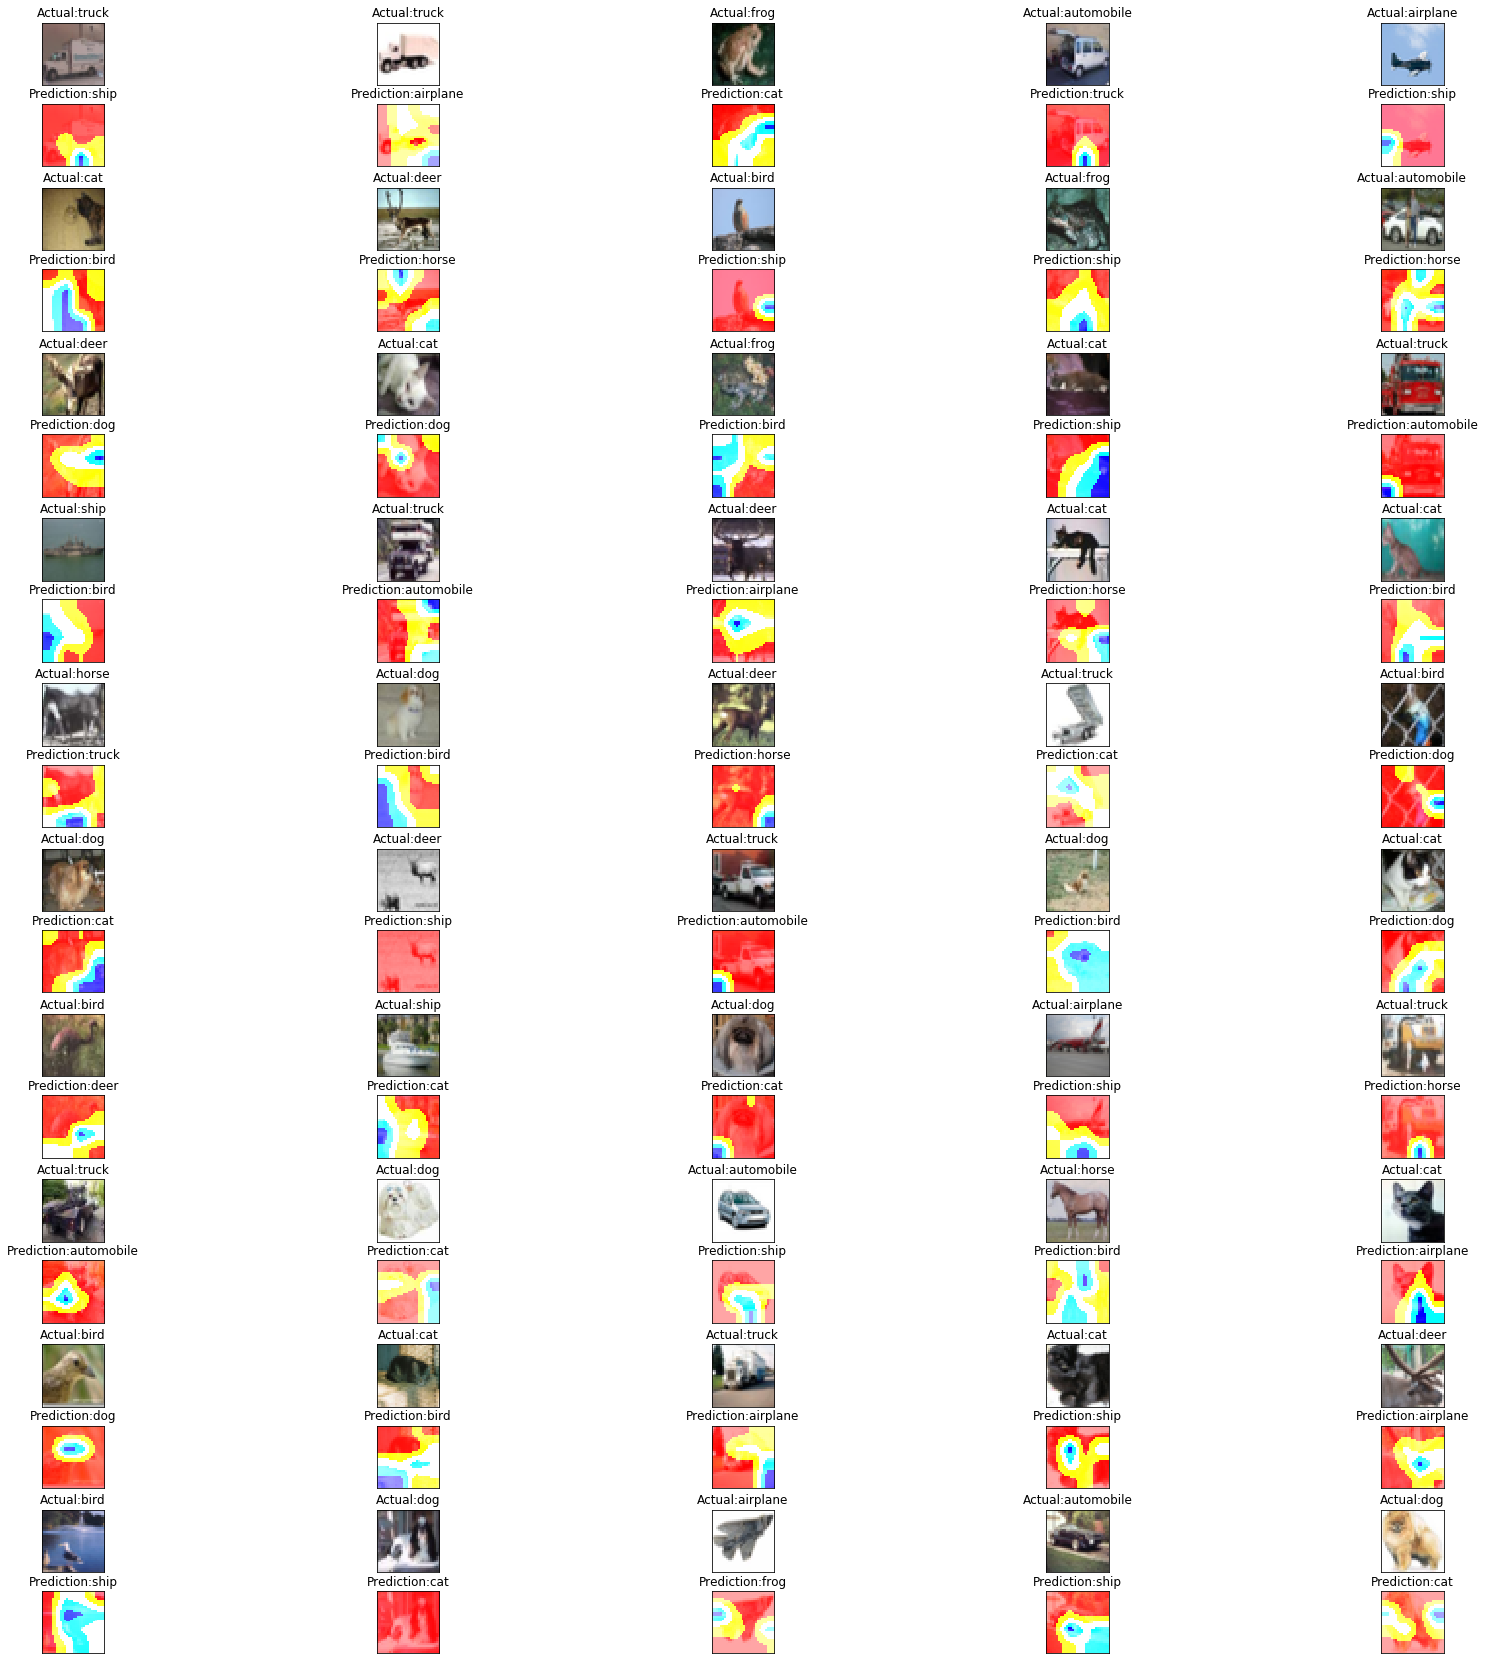

In [56]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(30, 30))
for index, value in enumerate(np.random.choice(misclassified_index, size = 50)):
  img = test_features[value]
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer("stage2_unit1_conv1")

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for k in range(128):
    conv_layer_output_value[:, :, k] *= pooled_grads_value[k]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  superimposed_img = 0.65*(img) + 0.40*heatmap
  
  imgs=[img, superimposed_img]
  outer = gridspec.GridSpec(10, 5, wspace=0.0, hspace=0.15)
  inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                  subplot_spec=outer[index], wspace=0.0, hspace=0.30)
  titles=['Actual:'+class_names[np.argmax(test_labels[value])], 'Prediction:'+class_names[class_idx]]
  for j in range(2):
      ax = plt.Subplot(fig, inner[j])
      ax.imshow(imgs[j])
      ax.set_xticks([])
      ax.set_yticks([])
      ax.set_title(titles[j])
      fig.add_subplot(ax)
  
fig.show()